0.005 0.1
ratio 0.9974898560730812 [A] 4.987449280365405
0.05 0.1
ratio 0.9974898560730812 [A] 4.987449280365405
0.05 0.01
ratio 0.926288317750839 [A] 4.631441588754195
0.1 0.01
ratio 0.926288317750839 [A] 4.631441588754195
0.1 0.1
ratio 0.9974898560730812 [A] 4.987449280365406
0.1 0.005
ratio 0.8162738366116035 [A] 4.081369183058017
0.05 0.02
ratio 0.97263502552664 [A] 4.8631751276332
0.02 0.1
ratio 0.9974898560730812 [A] 4.987449280365406
0.02 0.02
ratio 0.97263502552664 [A] 4.8631751276332


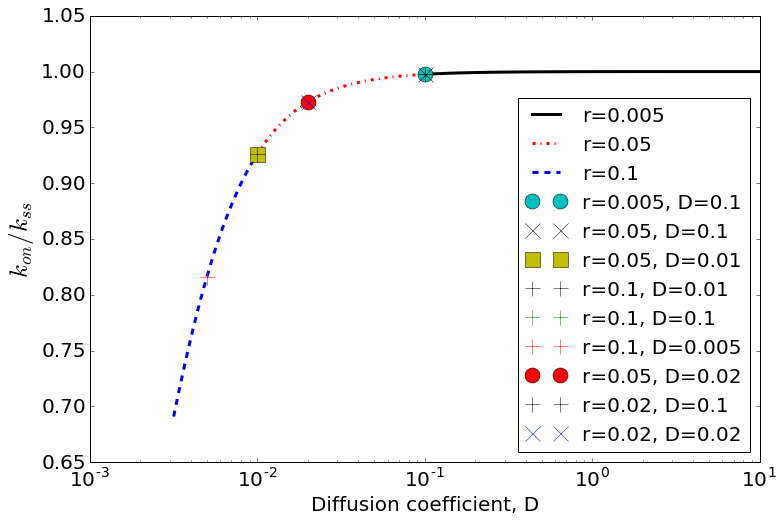

In [2]:
from math import pi as pi
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
fig,ax=plt.subplots()
def cal(rm,D):
    R=rm*2
    Ca=5
    Cb=1  #[B]
    k0=0.1  #production rate
    keff = k0/Ca/Cb #degradation rate     
    kd=4*pi*R*D*2    
    ka=keff*kd/(kd-keff)
    kon=kd*ka/(kd+ka)
    t2=(4*pi*Cb*(ka*R/(ka+kd))**3)**0.5
    kss=kon*(1+t2)
    return kon/kss,kss
    
def ratio(rm,Ds,m):
    ratios=[]
    for D in Ds:
        rr=cal(rm,D)
        ratios.append(rr[0])
    plt.plot(Ds,ratios,m,label='r={:.3}'.format(rm),linewidth=3)
    #print('kfac',ka/kd)
    #print('kss,kon',kss,kon,kon/kss)
    #print('[A]',k0/kss/Cb)
 
def point(rm,D,m):
    rr=cal(rm,D)
    print(rm,D)
    print('ratio',rr[0],'[A]',0.1/rr[1])
    plt.plot(D,rr[0],m,markersize=15,label='r={:.3}, D={:.3}'.format(rm,D))    

ratio(0.005,np.logspace(-1,1,50),'k-')
ratio(0.05,np.logspace(-2,-1,50),'r-.')
ratio(0.1,np.logspace(-2.5,-2,50),'b--')
point(0.005,0.1,'co')
point(0.05,0.1,'kx')
point(0.05,0.01,'ys')
point(0.1,0.01,'k+')
point(0.1,0.1,'g+')
point(0.1,0.005,'r+')
point(0.05,0.02,'ro')
point(0.02,0.1,'k+')
point(0.02,0.02,'bx')
plt.xscale('log')
plt.xlabel('Diffusion coefficient, D',fontsize=20)
plt.ylabel('$k_{on}/k_{ss}$',fontsize=25)
plt.tick_params(labelsize=20)
plt.ylim(0.65,1.05)
plt.legend(loc=4,fontsize=20)
fig.set_size_inches(12, 8)

#plt.savefig('/home/chew/ecellwork/figure/kss.png')

In [65]:
from ecell4 import *
fac=1.0208582
def getconc(rm,D,L,sim):
    if (sim=='spa'):
        V=spatiocyte.SpatiocyteWorld.calculate_volume(Real3(L,L,L),rm)  
    else: V=L**3
    d=np.genfromtxt('/home/chew/outputdata/sturrock_bd_{}_rm{}_D{}_L{}'.format(sim,rm,D,L),delimiter=',')    
    er=np.genfromtxt('/home/chew/outputdata/sturrock_bd_{}_rm{}_D{}_L{}_err'.format(sim,rm,D,L),delimiter=',')        
    con=(np.mean(d[:,1][90:])/V)
    err=(np.mean(er[:,1][90:])/V)
    return [con,err]

#corrected spatiocyte (larger voxel)
def getconcb(rm,D,L,sim):
    V=spatiocyte.SpatiocyteWorld.calculate_volume(Real3(L,L,L),fac*rm)  
    d=np.genfromtxt('/home/chew/outputdata/sturrock_bd_{}_rm{}_D{}_L{}b'.format(sim,rm,D,L),delimiter=',')    
    er=np.genfromtxt('/home/chew/outputdata/sturrock_bd_{}_rm{}_D{}_L{}b_err'.format(sim,rm,D,L),delimiter=',')        
    con=(np.mean(d[:,1][90:])/V)
    err=(np.mean(er[:,1][90:])/V)
    print(V)
    return [con,err]
 
getconcb(0.05,0.01,4.64,'spa'),getconc(0.05,0.01,4.64,'spa')

108.38292114794505


([4.5857485009412073, 0.015075895682708462],
 [4.6509513561771527, 0.0038965152664093886])

spa 0.05 0.1 4.99552330405
spa 0.05 0.01 4.65095135618
spa 0.02 0.1 5.01043621547
spa 0.05 0.02 4.88545761188
spa 0.02 0.02 4.94530980937
108.38292114794505
spa 0.05 0.1 4.9901354274
108.38292114794505
spa 0.05 0.02 4.84882808056
gill 0.05 0.1 5.00379032736
gill 0.05 0.01 4.99658201851
gill 0.02 0.02 5.00611271143
RDME 0.05 0.1 6.22750199536
egfrd 0.05 0.02 4.8023
egfrd 0.05 0.1 4.950238000000002


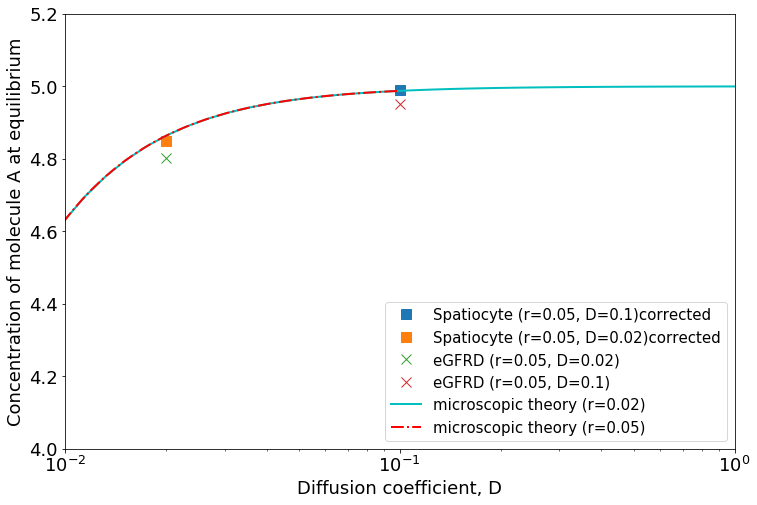

In [77]:
from math import pi as pi
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
fig,ax=plt.subplots()
def cal(rm,D):
    R=rm*2
    Ca=5
    Cb=1  #[B]
    k0=0.1  #production rate
    keff = k0/Ca/Cb #degradation rate     
    kd=4*pi*R*D*2    
    ka=keff*kd/(kd-keff)
    kon=kd*ka/(kd+ka)
    t2=(4*pi*Cb*(ka*R/(ka+kd))**3)**0.5
    kss=kon*(1+t2)
    return 0.1/kss
    
def ratio(rm,Ds,m):
    conas=[]
    for D in Ds:
        cona=cal(rm,D)
        conas.append(cona)
    plt.plot(Ds,conas,m,label='microscopic theory (r={:.3})'.format(rm),linewidth=2)
    #print('kfac',ka/kd)
    #print('kss,kon',kss,kon,kon/kss)
    #print('[A]',k0/kss/Cb)
 
#meane=[[4.9502380000000024, 0.05, 0.1], [4.5267360000000014, 0.05, 0.01], [4.8187549019607863, 0.02, 0.02], [4.9751490196078443, 0.02, 0.1], [4.8023176470588238, 0.05, 0.02]]
#meane=[ [4.8187549019607863, 0.02, 0.02], [4.5267360000000014, 0.05, 0.01], [4.9502380000000024, 0.05, 0.1]]
meane = [[4.8023, 0.05, 0.02], [4.9502380000000024, 0.05, 0.1]]
#meanspa=[[4.9933157987097632, 0.05, 0.1], [4.6509588156765238, 0.05, 0.01], [5.0262410336425427, 0.02, 0.1],[4.8760538719896731, 0.05, 0.02],[4.96,0.02,0.02]]
meanspa=[[0.05, 0.1,4.64], [ 0.05, 0.01,4.64], [ 0.02, 0.1,5.],[ 0.05, 0.02,4.64],[0.02,0.02,5.]]
meanG =[[0.05,0.1,4.64],[0.05,0.01,4.64],[0.02,0.02,4.64]]
meanspab=[[0.05,0.1,4.64],[0.05,0.02,4.64]]#[[0.05,0.01,4.64],[0.02,0.02,4.64],[0.05,0.1,4.64]]
meanmeso=[[0.05,0.1,4.64]]
ms=10
for rm,D,L in meanspa:
    con,err = getconc(rm,D,L,'spa')
    print('spa',rm,D,con)
    #plt.plot(D,con,'+',markersize=ms,label='Spatiocyte (r={}, D={})'.format(rm,D)) 
    
for rm,D,L in meanspab:
    con,err = getconcb(rm,D,L,'spa')
    print('spa',rm,D,con)
    plt.plot(D,con,'s',markersize=ms,label='Spatiocyte (r={}, D={})corrected'.format(rm,D)) 
    
#plt.plot(0.02,4.819,'s',label='r=0.02,D=0.02,rv=rm*factor')
#plt.plot(0.01,4.5648,'s',label='r=0.05,D=0.01,rv=rm*factor')
for rm,D,L in meanG:
    con,err = getconc(rm,D,L,'gillespie')
    print('gill',rm,D,con)        
    #plt.plot(D,con,'.',markersize=ms,label='Gillespie (r={}, D={})'.format(rm,D))            
for rm,D,L in meanmeso:
    con,err = getconc(rm,D,L,'meso')
    print('RDME',rm,D,con)        
    #plt.plot(D,con,'.',markersize=ms,label='RDME (r={}, D={})'.format(rm,D))            
for con,rm,D in meane:
    print('egfrd',rm,D,con)     
    plt.plot(D,con,'x',markersize=ms,label='eGFRD (r={}, D={})'.format(rm,D))        
ratio(0.02,np.logspace(-2,1,50),'c-')
ratio(0.05,np.logspace(-2.5,-1,50),'r-.')
#ratio(0.1,np.logspace(-2.5,-2,50),'b--')
plt.xscale('log')
s=18
plt.xlabel('Diffusion coefficient, D',fontsize=s)
plt.ylabel('Concentration of molecule A at equilibrium',fontsize=s)
plt.tick_params(labelsize=s)
plt.ylim(4,5.2)
plt.xlim(0.01,1)
plt.legend(loc=4,fontsize=15)
fig.set_size_inches(12, 8)
plt.savefig('/home/chew/ecellwork/figure/kss_meanA_inprtn_CD.png')

4.98473542344
4.98276294082


AttributeError: module 'matplotlib.pylab' has no attribute 'size_inches'

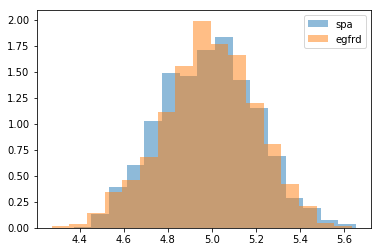

In [100]:
from ecell4 import *
from math import pi as pi
import math
import numpy as np
import matplotlib.pylab as plt
from scipy import special
%matplotlib inline

fac=1.0208582
def getc(rm,D,L,sim):
    if (sim=='spa'):
        V=spatiocyte.SpatiocyteWorld.calculate_volume(Real3(L,L,L),fac*rm)  
        d=np.genfromtxt('/home/chew/outputdata/sturrock_bd_{}_rm{}_D{}_L{}b_dur10000'.format(sim,rm,D,L),delimiter=',')    
    else: 
        V=L**3
        d=np.genfromtxt('/home/chew/outputdata/sturrock_bd_{}_rm{}_D{}_L{}b_dur5000'.format(sim,rm,D,L),delimiter=',')    
        
    
    #er=np.genfromtxt('/home/chew/outputdata/sturrock_bd_{}_rm{}_D{}_L{}b_err'.format(sim,rm,D,L),delimiter=',')        
    con=((d[:,1][10000:])/V)
    print(np.mean(con))
    #err=(np.mean(er[:,1][90:])/V)
    #plt.plot(con[10000:])
    #plt.plot(con)
    plt.hist(con,bins=np.arange(min(con),max(con),0.08),normed=True,alpha=0.5,label=sim)
    #plt.hist(con[10000:],bins=np.arange(480,620,1),normed=True,alpha=0.5)
    return #[con,err]

getc(0.05,0.1,4.64,'spa')
getc(0.05,0.1,4.64,'egfrd')
mid = np.arange(4,6,0.1)
#fc=lambda n:(mean)**n *np.exp(-mean)/special.gamma(n+1)
#plt.plot(mid,[fc(i) for i in mid],'.',label='poisson distribution')
plt.legend()
plt.xlabel('concentration of A')
plt.ylabel('normalized frequency')
plt.savefig('/home/chew/ecellwork/figure/kss_distributionofA_CD.png')
#mean=5.
#fc=lambda n:(mean)**n *np.exp(-mean)/math.factorial(n)
#mid=np.arange(4,6,0.05)
#plt.plot(mid,[fc(i) for i in mid],'-',label='poisson distribution')

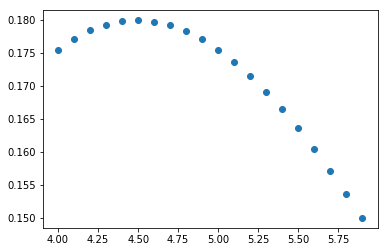

In [93]:
fc=lambda n:(mean)**n *np.exp(-mean)/special.gamma(n+1)
plt.plot(mid,[fc(i) for i in mid],'o',label='poisson distribution')

In [12]:
N=4.5*100
N*5*3.14*voxelr**3/3

0.29437500000000005

In [46]:
import math
math.exp(-math.pi)
math.log(0.05)

-2.995732273553991